# Cricket Data Analysis

## Context: 
Here I am analysing data from my favourite game Cricket. It is one of the most popular sports game played around the world. I will try to get answers of numerous questions like who has been the best player, How has been the players' performance throughout there careers and much more.

## Questions

- [Q 1. What is the time range of this data?](#Q-1.-What-is-the-time-range-of-this-data?)<br><br>
- [Q 2. Top 5 countries having the most number of batsmen?](#Q-2.-Top-5-countries-having-the-most-number-of-batsmen?)<br><br>
- [Q 3. List the top 3 batsmen from each country based on 100's scored after year 2011?](#Q-3.-List-the-top-3-batsmen-from-each-country-based-on-100's-scored-after-year-2011?)<br><br>
- [Q 4. Show Virat Kohli's batting performace throughout his career.](#Q-4.-Show-Virat-Kohli's-batting-performace-throughout-his-career.)<br><br>


### Q 1. What is the time range of this data? 
(below data is for batsmen in ODI format for 21st Century)

In [2]:
import pandas as pd

df = pd.read_csv("https://query.data.world/s/qdqvndb7mi7acz5mxjc2ka5ei52lgm")
df.columns

Index(['Innings Player', 'Innings Runs Scored', 'Innings Runs Scored Num',
       'Innings Minutes Batted', 'Innings Batted Flag', 'Innings Not Out Flag',
       'Innings Balls Faced', 'Innings Boundary Fours',
       'Innings Boundary Sixes', 'Innings Batting Strike Rate',
       'Innings Number', 'Opposition', 'Ground', 'Innings Date', 'Country',
       '50's', '100's', 'Innings Runs Scored Buckets', 'Innings Overs Bowled',
       'Innings Bowled Flag', 'Innings Maidens Bowled',
       'Innings Runs Conceded', 'Innings Wickets Taken', '4 Wickets',
       '5 Wickets', '10 Wickets', 'Innings Wickets Taken Buckets',
       'Innings Economy Rate'],
      dtype='object')

In [3]:
# Since the data we have is for batsmen only, we do not need columns associated with bowling,
# Hense we can remove columns from [Innings Overs Bowled] through [Innings Economy Rate].

df.drop(['Innings Overs Bowled',
       'Innings Bowled Flag', 'Innings Maidens Bowled',
       'Innings Runs Conceded', 'Innings Wickets Taken', '4 Wickets',
       '5 Wickets', '10 Wickets', 'Innings Wickets Taken Buckets',
       'Innings Economy Rate'], axis=1, inplace=True)
df.head()

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets
0,JJ Roy,180,180,151,1.0,0.0,151,16,5,119.20,2,v Australia,Melbourne,2018/01/14,England,0.0,1.0,150-199
1,AD Hales,171,171,166,1.0,0.0,122,22,4,140.16,1,v Pakistan,Nottingham,2016/08/30,England,0.0,1.0,150-199
2,JJ Roy,162,162,172,1.0,0.0,118,13,3,137.28,2,v Sri Lanka,The Oval,2016/06/29,England,0.0,1.0,150-199
3,AJ Strauss,158,158,188,1.0,0.0,145,18,1,108.96,2,v India,Bengaluru,2011/02/27,England,0.0,1.0,150-199
4,AJ Strauss,154,154,201,1.0,0.0,140,16,5,110.00,1,v Bangladesh,Birmingham,2010/07/12,England,0.0,1.0,150-199


In [193]:
df.dtypes  # Innings Date column is not a date type column

Innings Player                  object
Innings Runs Scored             object
Innings Runs Scored Num         object
Innings Minutes Batted          object
Innings Batted Flag            float64
Innings Not Out Flag           float64
Innings Balls Faced             object
Innings Boundary Fours          object
Innings Boundary Sixes          object
Innings Batting Strike Rate     object
Innings Number                  object
Opposition                      object
Ground                          object
Innings Date                    object
Country                         object
50's                           float64
100's                          float64
Innings Runs Scored Buckets     object
dtype: object

In [231]:
df['Innings Date'] = pd.to_datetime(df['Innings Date'])   #Column converted to type datetime

latest_year = df['Innings Date'].dt.year.max()            #latest year
oldest_year = df['Innings Date'].dt.year.min()

print(f"This data contains data from {oldest_year} to {latest_year}")

This data contains data from 2001 to 2020


### Q 2. Top 5 countries having the most number of batsmen?

In [232]:
#Group by contries taking the count of players after removing the duplicate values for players

df[["Country", "Innings Player"]].drop_duplicates().groupby(
    "Country"
).count().sort_values("Innings Player", ascending=False).head(5).rename(columns = {'Innings Player' : 'Count of Players'})

,Count of Players
Country,
England,122
India,122
West Indies,121
Sri Lanka,113
Pakistan,113


### Q 3. List the top 3 batsmen from each country based on 100's scored after year 2011?
In 2011 India won the world cup, hense we are interested in the post world cup stats.

In [234]:
len(df.index)

327328

In [236]:
# To clean the data we need to remove the duplicate rows

df.drop_duplicates(inplace = True)
len(df.index)

109253

In [251]:
#to get the list of players with their count of 100's after year 2011

df_top_players = df[df['Innings Date'].dt.year > 2011][["Country", "Innings Player","100's"]].groupby(
    ["Country","Innings Player"], as_index = False
).sum().sort_values(["Country","100's"], ascending= [True,False])

In [259]:
#to rank the players within their counties with respect to their 100's count

df_top_players['rank within country'] = df_top_players.groupby('Country')["100's"].rank(method = 'first', ascending=False)

df_top_players[df_top_players['rank within country'] <3].head(10)

,Country,Innings Player,100's,rank within country
28,Afghanistan,Rahmat Shah,4.0,1.0
19,Afghanistan,Mohammad Shahzad,3.0,2.0
57,Australia,DA Warner,18.0,1.0
44,Australia,AJ Finch,16.0,2.0
152,Bangladesh,Tamim Iqbal,10.0,1.0
131,Bangladesh,Mushfiqur Rahim,6.0,2.0
178,England,JE Root,16.0,1.0
169,England,EJG Morgan,9.0,2.0
271,India,V Kohli,35.0,1.0
258,India,RG Sharma,27.0,2.0


### Q 4. Show Virat Kohli's batting performace throughout his career.
Batting performance can be shown in two ways
1. Total runs scored in each year and total runs/innings
2. Achievements in each year i.e. number of 100's and 50's

In [303]:
#Filter out Kohli's data

df_kohli = df.loc[df['Innings Player'] == 'V Kohli']

#Need to change data type of [Innings Runs Scored Num] to numeric in order to do the sum over

df_kohli["Innings Runs Scored Num"] = pd.to_numeric(df_kohli["Innings Runs Scored Num"], errors = 'coerce')

In [336]:
df_kohli_YoY = (
    df_kohli[
        [
            "Innings Date",
            "50's",
            "100's",
            "Innings Runs Scored Num",
            "Innings Batted Flag",
        ]
    ]
    .groupby(df_kohli["Innings Date"].dt.year)
    .sum().reset_index()
    .rename(
        columns={
            "Innings Date": "Year",
            "50's": "Total 50's",
            "100's": "Total 100's",
            "Innings Runs Scored Num": "Total Runs",
            "Innings Batted Flag": "Total Innings Played",
        }
    )
)
df_kohli_YoY.head()

,Year,Total 50's,Total 100's,Total Runs,Total Innings Played
0,2008,1.0,0.0,159.0,5.0
1,2009,2.0,1.0,325.0,8.0
2,2010,7.0,3.0,995.0,24.0
3,2011,8.0,4.0,1381.0,34.0
4,2012,3.0,5.0,1026.0,17.0


In [337]:
df_kohli_YoY = df_kohli_YoY.astype(             #Converting the required columns from float to int
    {
        "Total 50's": "int",
        "Total 100's": "int",
        "Total Runs": "int",
        "Total Innings Played": "int",
    }
)
df_kohli_YoY.head()

,Year,Total 50's,Total 100's,Total Runs,Total Innings Played
0,2008,1,0,159,5
1,2009,2,1,325,8
2,2010,7,3,995,24
3,2011,8,4,1381,34
4,2012,3,5,1026,17


In [338]:
#Adding another parameter [Runs per innning]

df_kohli_YoY["Runs per Inning"] = df_kohli_YoY["Total Runs"]//df_kohli_YoY["Total Innings Played"]
df_kohli_YoY.head()

,Year,Total 50's,Total 100's,Total Runs,Total Innings Played,Runs per Inning
0,2008,1,0,159,5,31
1,2009,2,1,325,8,40
2,2010,7,3,995,24,41
3,2011,8,4,1381,34,40
4,2012,3,5,1026,17,60


In [363]:
#Showing the batting performance in some visuals

import matplotlib.pyplot as plt

xpoints = df_kohli_YoY['Year']

ypoints = df_kohli_YoY['Total Runs']
ypoints2 = df_kohli_YoY['Runs per Inning']
ypoints3 = df_kohli_YoY["Total 50's"]
ypoints4 = df_kohli_YoY["Total 100's"]

Text(0.5, 1.0, 'Kohli batting performance Year over Year')

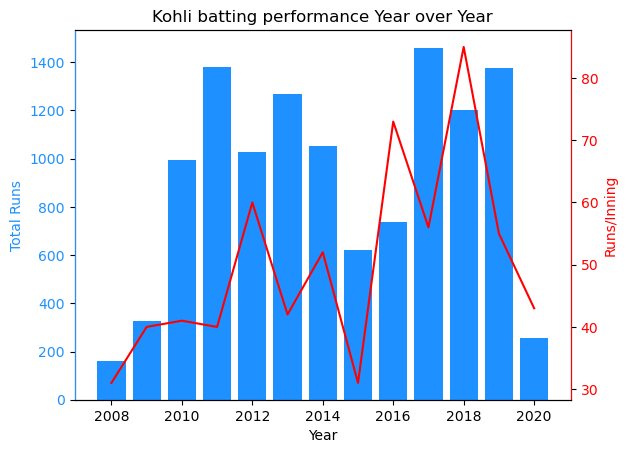

In [434]:
fig, ax1 = plt.subplots()                                     #creating 1 figure that can have multiple plots

color1 = 'dodgerblue'
color2 = 'red'

ax1.bar(xpoints, ypoints, color = color1)                     #makes a bar chart
ax1.tick_params(axis = 'y' , labelcolor = color1)             #y-labels color on the left y axis turns into color1
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Runs', color = color1)                  #y-axis title color of chart_1 i.e. ax1 turns into color1

ax2 = ax1.twinx()                                             #ax2 i.e. chart_2 will have same x-axis as ax1
ax2.plot(xpoints, ypoints2, color = color2)
ax2.set_ylabel('Runs/Inning', color = color2)
ax2.tick_params(axis = 'y' , labelcolor = color2)
ax2.spines['left'].set_color(color1)                          #spine color of the y-axis turnes into color1
ax2.spines['right'].set_color(color2)

plt.title("Kohli batting performance Year over Year")
